# Random Forest Tuning! Warning! 

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split

In [111]:
preprocessed_train_set = pd.read_csv('data/preprocessed_train_set.csv', sep=';')
train_target = pd.read_csv('data/train_target.csv', sep=';')

In [112]:
ids = ['application_id','customer_id']
train_ids = preprocessed_train_set[ids]

preprocessed_train_set = preprocessed_train_set.drop(ids, 1)

In [113]:
preprocessed_train_set, X_validation, train_target, y_validation = train_test_split(
    preprocessed_train_set, 
    train_target, 
    test_size=0.2, 
    random_state=2019,
    stratify = train_target)

In [114]:
model =  RandomForestClassifier(
    n_estimators=1000, 
    class_weight='balanced')

In [115]:
model.fit(
    preprocessed_train_set,
    train_target)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [116]:
pred_labels = model.predict(X_validation)

In [117]:
def plot_roc(target, predicted_proba):
    fpr, tpr, _ = roc_curve(target, predicted_proba)
    auc_plot = roc_auc_score(target, predicted_proba)
    
    plt.figure(figsize=(10,5))
    plt.plot(fpr, tpr, '-',  color='red', lw=1.5, label='AUC = %0.3f' % auc_plot)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Chance')

    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.legend(loc="lower right", fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    

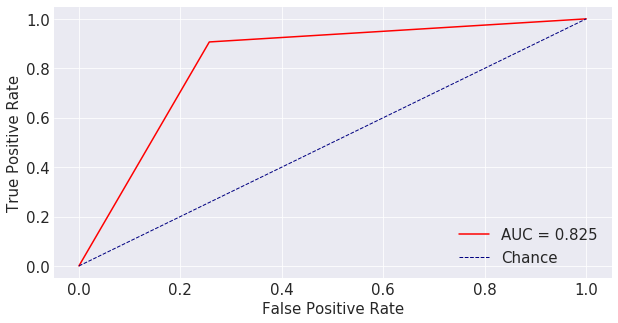

In [118]:
plot_roc(y_validation, pred_labels)   

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


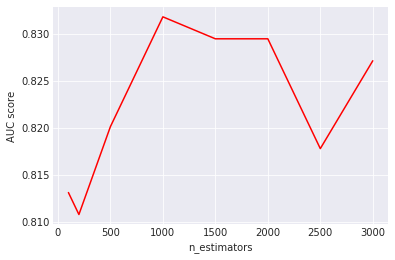

In [119]:
n_estimators = [100,200,500,1000,1500,2000,2500,3000]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, class_weight='balanced')
    
    rf.fit(preprocessed_train_set, train_target)
    
    y_pred = rf.predict(X_validation)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_validation)
    auc_plot = roc_auc_score(y_validation, y_pred)
    test_results.append(auc_plot)

    
plt.plot(n_estimators, test_results, 'r', label='Test AUC')
#plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

## Tuning  n_estimators

In [14]:
param_test1 = {
    'n_estimators' : [100,200,500,700,1000,1250,1500,1750,2000,2250,2500]
}

gsearch1 = GridSearchCV(
    estimator = RandomForestClassifier(
        n_estimators=1000, 
        class_weight='balanced'),
    
    param_grid = param_test1, 
    scoring='roc_auc',
    n_jobs=-1,
    iid=False, 
    cv=3
)
gsearch1.fit(preprocessed_train_set, train_target)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 500, 700, 1000, 1250, 1500, 1750, 2000, 2250, 2500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [15]:
print(gsearch1.best_params_)
print(gsearch1.best_score_)

{'n_estimators': 2250}
0.8444745874940702


## Tuning max_depth

In [19]:
param_test2 = {
    'max_depth' : range(1,35,2)
}

gsearch2 = GridSearchCV(
    estimator = RandomForestClassifier(
        n_estimators=2250, 
        class_weight='balanced'),
    
    param_grid = param_test2, 
    scoring='roc_auc',
    n_jobs=-1,
    iid=False, 
    cv=3
)
gsearch2.fit(preprocessed_train_set, train_target)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2250, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [20]:
print(gsearch2.best_params_)
print(gsearch2.best_score_)

{'max_depth': 21}
0.8440101204492709


# Tuning min_samples_split

In [37]:
param_test3 = {
    'min_samples_split' : range(2,11,1)
}

gsearch3 = GridSearchCV(
    estimator = RandomForestClassifier(
        n_estimators=2250, 
        max_depth=21,
        class_weight='balanced'),
    
    param_grid = param_test3, 
    scoring='roc_auc',
    n_jobs=-1,
    iid=False, 
    cv=3
)
gsearch3.fit(preprocessed_train_set, train_target)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=21, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2250, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [38]:
print(gsearch3.best_params_)
print(gsearch3.best_score_)

{'min_samples_split': 2}
0.8435900536092397


# Tuning min_samples_leaf

In [55]:
param_test4 = {
    'min_samples_leaf' : range(1,15)
}

gsearch4 = GridSearchCV(
    estimator = RandomForestClassifier(
        n_estimators=2250, 
        max_depth=21,
        min_samples_split=2,
        class_weight='balanced'),
    
    param_grid = param_test4, 
    scoring='roc_auc',
    n_jobs=-1,
    iid=False, 
    cv=3
)
gsearch4.fit(preprocessed_train_set, train_target)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=21, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2250, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [56]:
print(gsearch4.best_params_)
print(gsearch4.best_score_)

{'min_samples_leaf': 1}
0.8430835602964891


# Tuning max_features

In [59]:
param_test5 = {
    'max_features' : range(1, preprocessed_train_set.shape[1])
}

gsearch5 = GridSearchCV(
    estimator = RandomForestClassifier(
        n_estimators=2250, 
        max_depth=21,
        min_samples_split=2,
        min_samples_leaf=1,
        class_weight='balanced'),
    
    param_grid = param_test5, 
    scoring='roc_auc',
    n_jobs=-1,
    iid=False, 
    cv=3
)
gsearch5.fit(preprocessed_train_set, train_target)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=21, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2250, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [60]:
print(gsearch5.best_params_)
print(gsearch5.best_score_)

{'max_features': 6}
0.8442545333660516


# Training on whole training set and testing on Test set

In [120]:
preprocessed_train_set = pd.read_csv('data/preprocessed_train_set.csv', sep=';')
train_target = pd.read_csv('data/train_target.csv', sep=';')

preprocessed_test_set = pd.read_csv('data/preprocessed_test_set.csv', sep=';')
test_target = pd.read_csv('data/test_target.csv', sep=';')

In [121]:
ids = ['application_id','customer_id']

train_ids = preprocessed_train_set[ids]
test_ids = preprocessed_test_set[ids]

preprocessed_train_set = preprocessed_train_set.drop(ids, 1)
preprocessed_test_set = preprocessed_test_set.drop(ids, 1)

In [122]:
final_model = RandomForestClassifier(
    n_estimators=2250, 
    max_depth=21,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=6,
    class_weight='balanced')

In [123]:
# Training
final_model.fit(preprocessed_train_set, train_target)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=21, max_features=6,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2250, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [124]:
#Prediction
prediction = final_model.predict(preprocessed_test_set)

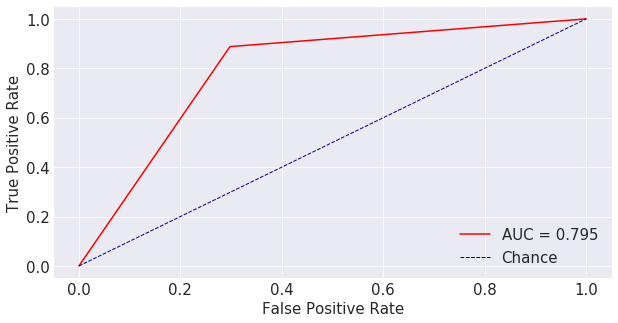

In [126]:
# Plot ROC
plot_roc(test_target, prediction)   

AUC droppped from 83 to 80. It's normal becuase I obtained 83 on validation set that is very small